In [1]:
# Import Library
import pandas as pd
import os
import numpy as np
import re
import seaborn as sns
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import torch
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tqdm import tqdm
import preprocessor as p
from wordcloud import WordCloud
import joblib
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rkhdi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rkhdi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## ***Data Transformation***


Tahap ini dilakukan setelah data dibersihkan dan dianalisis secara eksploratif. Tujuannya adalah mengubah data menjadi format numerik yang dapat diproses oleh algoritma machine learnig, terdiri dari 3 tahapan:

> - **Label Encoding**

> - **Data Splitting**

> - **TF - IDF**


In [2]:
data = pd.read_csv('content/hasil_labeling.csv')
display(data)

,full_text,text_clean_modeling,case_folding,normalize,tokenize,stopword,stemming,text_clean_roberta,sentiment,score
0,@RafeyPrincess @VDSyst3msX Survei menunjukkan ...,Survei menunjukkan kepuasan publik thd pemerin...,survei menunjukkan kepuasan publik thd pemerin...,survei menunjukkan kepuasan publik terhadap pe...,"['survei', 'menunjukkan', 'kepuasan', 'publik'...","['survei', 'kepuasan', 'publik', 'pemerintahan...",survei puas publik perintah prabowogibran duku...,<user> <user> survei menunjukkan kepuasan publ...,positive,0.925051
1,Warga Antusias Halalbihalal dengan Prabowo Uca...,Warga Antusias Halalbihalal dengan Prabowo Uca...,warga antusias halalbihalal dengan prabowo uca...,warga antusias halalbihalal dengan prabowo uca...,"['warga', 'antusias', 'halalbihalal', 'dengan'...","['warga', 'antusias', 'halalbihalal', 'prabowo...",warga antusias halalbihalal prabowo ucap terim...,warga antusias halalbihalal dengan prabowo uca...,positive,0.994322
2,Program makan bergizi gratis berdampak besar t...,Program makan bergizi gratis berdampak besar t...,program makan bergizi gratis berdampak besar t...,program makan bergizi gratis berdampak besar t...,"['program', 'makan', 'bergizi', 'gratis', 'ber...","['program', 'makan', 'bergizi', 'gratis', 'ber...",program makan gizi gratis dampak kembang gener...,program makan bergizi gratis berdampak besar t...,positive,0.996487
3,@malikaelinata Program makan bergizi gratis be...,Program makan bergizi gratis berdampak besar t...,program makan bergizi gratis berdampak besar t...,program makan bergizi gratis berdampak besar t...,"['program', 'makan', 'bergizi', 'gratis', 'ber...","['program', 'makan', 'bergizi', 'gratis', 'ber...",program makan gizi gratis dampak kembang gener...,<user> program makan bergizi gratis berdampak ...,positive,0.990284
4,@arkan_aksawa Dengan adanya program Makan Berg...,Dengan adanya program Makan Bergizi Gratis ana...,dengan adanya program makan bergizi gratis ana...,dengan adanya program makan bergizi gratis ana...,"['dengan', 'adanya', 'program', 'makan', 'berg...","['program', 'makan', 'bergizi', 'gratis', 'ana...",program makan gizi gratis anakanak milik sempa...,<user> dengan adanya program makan bergizi gra...,positive,0.989687
...,...,...,...,...,...,...,...,...,...,...
5061,terdapat 2 program yakni : ppbp ( program pend...,terdapat program yakni ppbp program pendidikan...,terdapat program yakni ppbp program pendidikan...,terdapat program yakni ppbp program pendidikan...,"['terdapat', 'program', 'yakni', 'ppbp', 'prog...","['program', 'ppbp', 'program', 'pendidikan', '...",program ppbp program didik bisnis perban ppti ...,terdapat 2 program yakni : ppbp ( program pend...,neutral,0.895053
5062,Seperti program makan siang dan susu gratis un...,Seperti program makan siang dan susu gratis un...,seperti program makan siang dan susu gratis un...,seperti program makan siang dan susu gratis un...,"['seperti', 'program', 'makan', 'siang', 'dan'...","['program', 'makan', 'siang', 'susu', 'gratis'...",program makan siang susu gratis ajar nilai tim...,seperti program makan siang dan susu gratis un...,neutral,0.629112
5063,Jakarta https://t.co/LiWDT6HrY5 - Menteri Inve...,Jakarta Menteri InvestasiKepala Badan Koordina...,jakarta menteri investasikepala badan koordina...,jakarta menteri investasikepala badan koordina...,"['jakarta', 'menteri', 'investasikepala', 'bad...","['jakarta', 'menteri', 'investasikepala', 'bad...",jakarta menteri investasikepala badan koordina...,jakarta <url> - menteri investasi/kepala badan...,neutral,0.997978
5064,Program Prabowo-Gibran Makan Siang Gratis Masu...,Program PrabowoGibran Makan Siang Gratis Masuk...,program prabowogibran makan siang gratis masuk...,program prabowogibran makan siang gratis masuk...,"['program', 'prabowogibran', 'makan', 'siang',...","['program', 'prabowogibran', 'makan', 'siang',...",program prabowogibran makan siang gratis masuk...,program prabowo-gibran makan siang gratis masu...,neutral,0.998926


### ***Label Encoding***

> Melakukan encoding pada label (target) agar data label bisa diproses oleh algoritma machine learning.


In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['label_encoded'] = le.fit_transform(data['sentiment'])

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping Label Encoding:")
for label, encoded in label_mapping.items():
    print(f"{label} → {encoded}")

Mapping Label Encoding:
negative → 0
neutral → 1
positive → 2


In [4]:
data[['sentiment', 'label_encoded']]

,sentiment,label_encoded
0,positive,2
1,positive,2
2,positive,2
3,positive,2
4,positive,2
...,...,...
5061,neutral,1
5062,neutral,1
5063,neutral,1
5064,neutral,1


### ***Data Splitting***


> Membagi dataset menjadi data latih (training) dan data uji (testing) dengan tiga variasi proporsi:
- 80% data training dan 20% data testing
- 70% data training dan 30% data testing
- 60% data training dan 40% data testing

Tujuan penggunaan tiga variasi proporsi adalah untuk menguji kestabilan performa model pada kondisi jumlah data latih dan data uji yang berbeda.


In [5]:
# Pemilihan variabel fitur dan target
X = data['stemming']        # Fitur: teks yang sudah dipreprocessing
y = data['label_encoded']   # Target: label numerik hasil encoding

In [6]:
# 80% data training dan 20% data testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Jumlah data di Training Set: {X_train.shape[0]}")
print(f"Jumlah data di Testing Set: {X_test.shape[0]}")

Jumlah data di Training Set: 4052
Jumlah data di Testing Set: 1014


In [7]:
# 70% data training dan 30% data testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Jumlah data di Training Set: {X_train.shape[0]}")
print(f"Jumlah data di Testing Set: {X_test.shape[0]}")

Jumlah data di Training Set: 3546
Jumlah data di Testing Set: 1520


In [8]:
# 60% data training dan 40% data testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

print(f"Jumlah data di Training Set: {X_train.shape[0]}")
print(f"Jumlah data di Testing Set: {X_test.shape[0]}")

Jumlah data di Training Set: 3039
Jumlah data di Testing Set: 2027


### ***TF-IDF (Term Frequency Inverse Document Frequency)***


> Melakukan ekstraksi fitur teks menggunakan TF-IDF untuk mengubah teks menjadi bentuk numerik.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion
from scipy.sparse import hstack

# TF-IDF Word-level
tfidf_word = TfidfVectorizer(
    analyzer='word',
    ngram_range=(1,2),
    max_features=10000
)

# TF-IDF Char-level
tfidf_char = TfidfVectorizer(
    analyzer='char_wb',
    ngram_range=(2,5),
    max_features=10000
)

# Fitur Panjang Teks (jumlah kata dan karakter)
def text_length_features(texts):
    char_lengths = np.array([len(text) for text in texts]).reshape(-1, 1)
    word_lengths = np.array([len(text.split()) for text in texts]).reshape(-1, 1)
    return np.hstack((char_lengths, word_lengths))

length_transformer = FunctionTransformer(text_length_features, validate=False)

X_train_word = tfidf_word.fit_transform(X_train)
X_test_word = tfidf_word.transform(X_test)

X_train_char = tfidf_char.fit_transform(X_train)
X_test_char = tfidf_char.transform(X_test)

X_train_len = length_transformer.fit_transform(X_train)
X_test_len = length_transformer.transform(X_test)

from scipy.sparse import csr_matrix
X_train_combined = hstack([X_train_word, X_train_char, csr_matrix(X_train_len)])
X_test_combined = hstack([X_test_word, X_test_char, csr_matrix(X_test_len)])

# **CRISP-DM Phase 4: Modeling**

---

## ***SVM (Support Vector Machine)***

In [10]:
# SVM Model
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)

# Train model
svm_model.fit(X_train_combined, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


In [11]:
# Predict
y_pred_svm = svm_model.predict(X_test_combined)

### ***Hyperparamater Tuning (80:20)***

In [12]:
# Parameter Grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

In [13]:
# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit model
grid_search.fit(X_train_combined, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


,estimator,SVC(random_state=42)
,param_grid,"{'C': [0.1, 1, ...], 'class_weight': [None, 'balanced'], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [14]:
# Best parameters and score
print("\n=== Best Parameters ===")
print(grid_search.best_params_)

print("\n=== Best Cross-Validation Score ===")
print(grid_search.best_score_)


=== Best Parameters ===
{'C': 1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}

=== Best Cross-Validation Score ===
0.7088307226791278


In [15]:
# Save Model
joblib.dump(grid_search.best_estimator_, 'best_svm_model_8020.pkl')

['best_svm_model_8020.pkl']

In [16]:
# Predict
best_svm_model = joblib.load('best_svm_model_8020.pkl')
y_pred_svm_tuned = best_svm_model.predict(X_test_combined)

### ***Hyperparamater Tuning (70:30)***

In [17]:
# Parameter Grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

In [18]:
# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit model
grid_search.fit(X_train_combined, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


,estimator,SVC(random_state=42)
,param_grid,"{'C': [0.1, 1, ...], 'class_weight': [None, 'balanced'], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [19]:
# Best parameters and score
print("\n=== Best Parameters ===")
print(grid_search.best_params_)

print("\n=== Best Cross-Validation Score ===")
print(grid_search.best_score_)


=== Best Parameters ===
{'C': 1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}

=== Best Cross-Validation Score ===
0.7088307226791278


In [20]:
# Save Model
joblib.dump(grid_search.best_estimator_, 'best_svm_model_7030.pkl')

['best_svm_model_7030.pkl']

In [21]:
# Predict
best_svm_model = joblib.load('best_svm_model_7030.pkl')
y_pred_svm_tuned = best_svm_model.predict(X_test_combined)

### ***Hyperparamater Tuning (60:40)***

In [22]:
# Parameter Grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

In [23]:
# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit model
grid_search.fit(X_train_combined, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


,estimator,SVC(random_state=42)
,param_grid,"{'C': [0.1, 1, ...], 'class_weight': [None, 'balanced'], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [24]:
# Best parameters and score
print("\n=== Best Parameters ===")
print(grid_search.best_params_)

print("\n=== Best Cross-Validation Score ===")
print(grid_search.best_score_)


=== Best Parameters ===
{'C': 1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}

=== Best Cross-Validation Score ===
0.7088307226791278


In [25]:
# Save Model
joblib.dump(grid_search.best_estimator_, 'best_svm_model_6040.pkl')

['best_svm_model_6040.pkl']

In [26]:
# Predict
best_svm_model = joblib.load('best_svm_model_6040.pkl')
y_pred_svm_tuned = best_svm_model.predict(X_test_combined)

## ***XGBoost (eXtreme Gradient Boosting)***

In [27]:
# Build model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train
xgb_model.fit(X_train_combined, y_train)

c:\Users\rkhdi\Desktop\Personal\Workspace\web-aldo\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [18:41:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [28]:
# Predict
y_pred_xgb = xgb_model.predict(X_test_combined)

### ***Hyperparamater Tuning (80:20)***

In [29]:
# Inisialisasi model
xgb = XGBClassifier(
    objective='multi:softprob',      # Probabilitas
    num_class=3,                     # Jumlah kelas: negative, neutral, positive
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    tree_method='hist'
)

In [30]:
# Parameter space
param_dist = {
    'n_estimators': randint(100, 300),       # Jumlah pohon
    'max_depth': randint(3, 10),             # Kedalaman pohon
    'learning_rate': uniform(0.01, 0.3),     # Learning rate
    'subsample': uniform(0.6, 0.4),          # Subsample rasio data training
    'colsample_bytree': uniform(0.6, 0.4),   # Subsample fitur per pohon
    'gamma': uniform(0, 5),                  # Minimum loss reduction
}

In [31]:
# Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1_macro',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Training
random_search.fit(X_train_combined, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\rkhdi\Desktop\Personal\Workspace\web-aldo\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [18:59:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"XGBClassifier..._class=3, ...)"
,param_distributions,"{'colsample_bytree': <scipy.stats....00204778128F0>, 'gamma': <scipy.stats....0020477811EA0>, 'learning_rate': <scipy.stats....0020477811D80>, 'max_depth': <scipy.stats....0020477812380>, ...}"
,n_iter,30
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [32]:
# Best parameters and score
print("\n=== Best Parameters ===")
print(random_search.best_params_)

print("\n=== Best Cross-Validation Score ===")
print(random_search.best_score_)


=== Best Parameters ===
{'colsample_bytree': np.float64(0.8842651558743149), 'gamma': np.float64(0.5544541040591566), 'learning_rate': np.float64(0.14180095055973105), 'max_depth': 5, 'n_estimators': 162, 'subsample': np.float64(0.9583054382694077)}

=== Best Cross-Validation Score ===
0.6947814339226166


In [33]:
# Save Model
joblib.dump(random_search.best_estimator_, 'best_xgb_model_8020.pkl')

['best_xgb_model_8020.pkl']

In [34]:
# Predict
best_xgb = joblib.load('best_xgb_model_8020.pkl')
y_pred_xgb_tuned = best_xgb.predict(X_test_combined)

### ***Hyperparamater Tuning (70:30)***

In [35]:
# Inisialisasi model
xgb = XGBClassifier(
    objective='multi:softprob',      # Probabilitas
    num_class=3,                     # Jumlah kelas: negative, neutral, positive
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    tree_method='hist'
)

In [36]:
# Parameter space
param_dist = {
    'n_estimators': randint(100, 300),       # Jumlah pohon
    'max_depth': randint(3, 10),             # Kedalaman pohon
    'learning_rate': uniform(0.01, 0.3),     # Learning rate
    'subsample': uniform(0.6, 0.4),          # Subsample rasio data training
    'colsample_bytree': uniform(0.6, 0.4),   # Subsample fitur per pohon
    'gamma': uniform(0, 5),                  # Minimum loss reduction
}

In [37]:
# Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1_macro',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Training
random_search.fit(X_train_combined, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\rkhdi\Desktop\Personal\Workspace\web-aldo\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [19:15:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"XGBClassifier..._class=3, ...)"
,param_distributions,"{'colsample_bytree': <scipy.stats....0020477852710>, 'gamma': <scipy.stats....00204778518A0>, 'learning_rate': <scipy.stats....0020477811B70>, 'max_depth': <scipy.stats....0020477328D00>, ...}"
,n_iter,30
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [38]:
# Best parameters and score
print("\n=== Best Parameters ===")
print(random_search.best_params_)

print("\n=== Best Cross-Validation Score ===")
print(random_search.best_score_)


=== Best Parameters ===
{'colsample_bytree': np.float64(0.8842651558743149), 'gamma': np.float64(0.5544541040591566), 'learning_rate': np.float64(0.14180095055973105), 'max_depth': 5, 'n_estimators': 162, 'subsample': np.float64(0.9583054382694077)}

=== Best Cross-Validation Score ===
0.6947814339226166


In [39]:
# Save Model
joblib.dump(random_search.best_estimator_, 'best_xgb_model_7030.pkl')

['best_xgb_model_7030.pkl']

In [40]:
# Predict
best_xgb = joblib.load('best_xgb_model_7030.pkl')
y_pred_xgb_tuned = best_xgb.predict(X_test_combined)

### ***Hyperparamater Tuning (60:40)***

In [41]:
# Inisialisasi model
xgb = XGBClassifier(
    objective='multi:softprob',      # Probabilitas
    num_class=3,                     # Jumlah kelas: negative, neutral, positive
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    tree_method='hist'
)

In [42]:
# Parameter space
param_dist = {
    'n_estimators': randint(100, 300),       # Jumlah pohon
    'max_depth': randint(3, 10),             # Kedalaman pohon
    'learning_rate': uniform(0.01, 0.3),     # Learning rate
    'subsample': uniform(0.6, 0.4),          # Subsample rasio data training
    'colsample_bytree': uniform(0.6, 0.4),   # Subsample fitur per pohon
    'gamma': uniform(0, 5),                  # Minimum loss reduction
}

In [43]:
# Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1_macro',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Training
random_search.fit(X_train_combined, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\rkhdi\Desktop\Personal\Workspace\web-aldo\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [19:31:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"XGBClassifier..._class=3, ...)"
,param_distributions,"{'colsample_bytree': <scipy.stats....0020477852EF0>, 'gamma': <scipy.stats....0020477853D30>, 'learning_rate': <scipy.stats....0020477851600>, 'max_depth': <scipy.stats....0020477329CF0>, ...}"
,n_iter,30
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [44]:
print("\n=== Best Parameters ===")
print(random_search.best_params_)

print("\n=== Best Cross-Validation Score ===")
print(random_search.best_score_)


=== Best Parameters ===
{'colsample_bytree': np.float64(0.8842651558743149), 'gamma': np.float64(0.5544541040591566), 'learning_rate': np.float64(0.14180095055973105), 'max_depth': 5, 'n_estimators': 162, 'subsample': np.float64(0.9583054382694077)}

=== Best Cross-Validation Score ===
0.6947814339226166


In [45]:
# Save Model
joblib.dump(random_search.best_estimator_, 'best_xgb_model_6040.pkl')

['best_xgb_model_6040.pkl']

In [46]:
# Predict
best_xgb = joblib.load('best_xgb_model_6040.pkl')
y_pred_xgb_tuned = best_xgb.predict(X_test_combined)

# **CRISP-DM Phase 5: Evaluation**

---

## ***80% : 20%***

### ***Support Vector Machine (SVM)***

In [47]:
# Classification Report
print("\n=== SVM Classification Report ===")
labels = ['negative', 'neutral', 'positive']
print(classification_report(y_test, y_pred_svm, target_names=labels))


=== SVM Classification Report ===
              precision    recall  f1-score   support

    negative       0.77      0.77      0.77      1011
     neutral       0.67      0.69      0.68       530
    positive       0.69      0.67      0.68       486

    accuracy                           0.73      2027
   macro avg       0.71      0.71      0.71      2027
weighted avg       0.73      0.73      0.73      2027



In [48]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("=== SVM Confusion Matrix ===")
print(cm_svm)

=== SVM Confusion Matrix ===
[[780 132  99]
 [119 366  45]
 [110  51 325]]


#### ***Hyperparamater Tuning***

In [49]:
# Classification Report
print("\n=== Tuned SVM Classification Report ===")
labels = ['negative', 'neutral', 'positive']
print(classification_report(y_test, y_pred_svm_tuned, target_names=labels))


=== Tuned SVM Classification Report ===
              precision    recall  f1-score   support

    negative       0.76      0.83      0.79      1011
     neutral       0.69      0.66      0.68       530
    positive       0.76      0.64      0.70       486

    accuracy                           0.74      2027
   macro avg       0.74      0.71      0.72      2027
weighted avg       0.74      0.74      0.74      2027



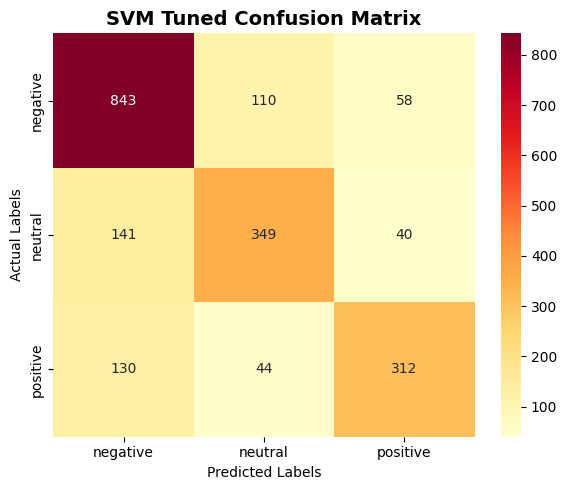

In [50]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm_tuned)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=labels, yticklabels=labels)

plt.title('SVM Tuned Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.tight_layout()
plt.show()

### ***XGBoost (eXtreme Gradient Boosting)***

In [51]:
# Classificaiton Report
print("\n=== XGBoost Classification Report ===")
labels = ['negative', 'neutral', 'positive']
print(classification_report(y_test, y_pred_xgb, target_names=labels))


=== XGBoost Classification Report ===
              precision    recall  f1-score   support

    negative       0.70      0.83      0.76      1011
     neutral       0.64      0.59      0.62       530
    positive       0.80      0.57      0.66       486

    accuracy                           0.70      2027
   macro avg       0.71      0.66      0.68      2027
weighted avg       0.71      0.70      0.70      2027



In [52]:
cm_svm = confusion_matrix(y_test, y_pred_xgb)
print("=== XGBoost Confusion Matrix ===")
print(cm_svm)

=== XGBoost Confusion Matrix ===
[[838 125  48]
 [193 314  23]
 [161  49 276]]


#### ***Hyperparamater Tuning***

In [53]:
# Classification Report
print("\n=== XGBoost Tuned Classification Report ===")
labels = ['negative', 'neutral', 'positive']
print(classification_report(y_test, y_pred_xgb_tuned, target_names=labels))


=== XGBoost Tuned Classification Report ===
              precision    recall  f1-score   support

    negative       0.72      0.84      0.77      1011
     neutral       0.65      0.61      0.63       530
    positive       0.80      0.58      0.67       486

    accuracy                           0.71      2027
   macro avg       0.72      0.67      0.69      2027
weighted avg       0.72      0.71      0.71      2027



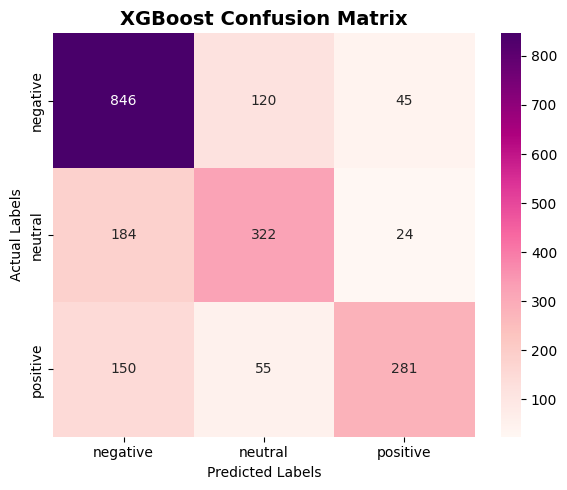

In [54]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_xgb_tuned)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='RdPu',
            xticklabels=labels, yticklabels=labels)

plt.title('XGBoost Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.tight_layout()
plt.show()

### ***Model Comparisons***

#### ***Confusion Matrix***

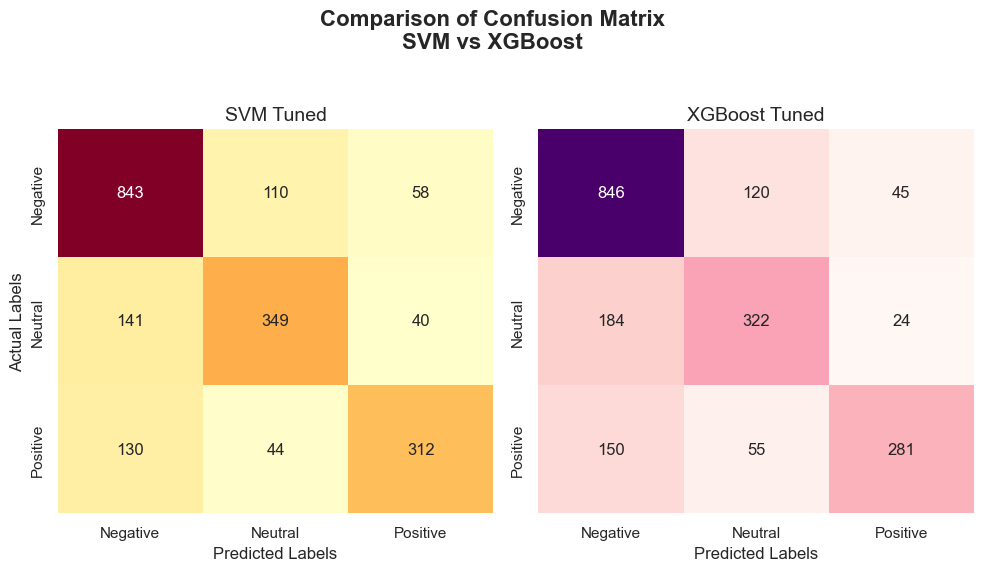

In [55]:
# Confusion Matrix
svm_cm = confusion_matrix(y_test, y_pred_svm_tuned)
xgb_cm = confusion_matrix(y_test, y_pred_xgb_tuned)

labels = ['Negative', 'Neutral', 'Positive']
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle('Comparison of Confusion Matrix\nSVM vs XGBoost', fontsize=16, fontweight='bold')

sns.heatmap(svm_cm, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=labels, yticklabels=labels, ax=axes[0], cbar=False)
axes[0].set_title('SVM Tuned', fontsize=14)
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('Actual Labels')

sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='RdPu',
            xticklabels=labels, yticklabels=labels, ax=axes[1], cbar=False)
axes[1].set_title('XGBoost Tuned', fontsize=14)
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### ***Classification Report***

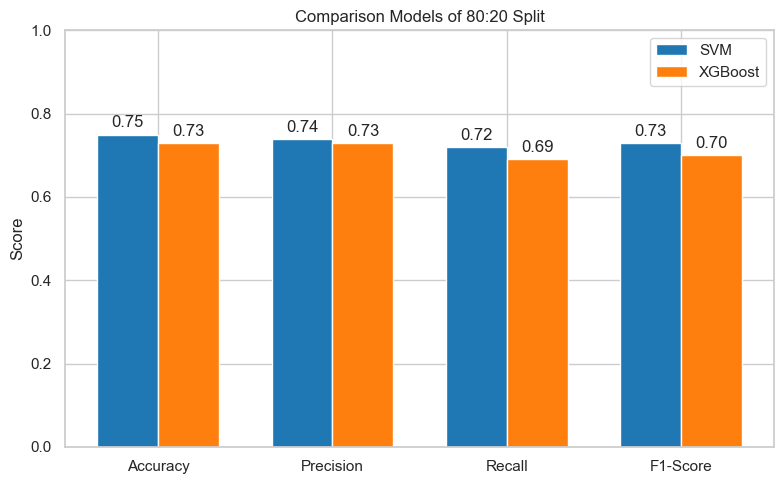

In [56]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
svm_scores = [0.75, 0.74, 0.72, 0.73]
xgb_scores = [0.73, 0.73, 0.69, 0.70]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, svm_scores, width, label='SVM', color='#1f77b4')
bars2 = ax.bar(x + width/2, xgb_scores, width, label='XGBoost', color='#ff7f0e')

ax.set_ylabel('Score')
ax.set_title('Comparison Models of 80:20 Split')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

## ***70% : 30%***

### ***Support Vector Machine (SVM)***

In [57]:
# Classification Report
print("\n=== SVM Classification Report ===")
labels = ['negative', 'neutral', 'positive']
print(classification_report(y_test, y_pred_svm, target_names=labels))


=== SVM Classification Report ===
              precision    recall  f1-score   support

    negative       0.77      0.77      0.77      1011
     neutral       0.67      0.69      0.68       530
    positive       0.69      0.67      0.68       486

    accuracy                           0.73      2027
   macro avg       0.71      0.71      0.71      2027
weighted avg       0.73      0.73      0.73      2027



In [58]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("=== SVM Confusion Matrix ===")
print(cm_svm)

=== SVM Confusion Matrix ===
[[780 132  99]
 [119 366  45]
 [110  51 325]]


#### ***Hyperparamater Tuning***

In [59]:
# Classification Report
print("\n=== Tuned SVM Classification Report ===")
labels = ['negative', 'neutral', 'positive']
print(classification_report(y_test, y_pred_svm_tuned, target_names=labels))


=== Tuned SVM Classification Report ===
              precision    recall  f1-score   support

    negative       0.76      0.83      0.79      1011
     neutral       0.69      0.66      0.68       530
    positive       0.76      0.64      0.70       486

    accuracy                           0.74      2027
   macro avg       0.74      0.71      0.72      2027
weighted avg       0.74      0.74      0.74      2027



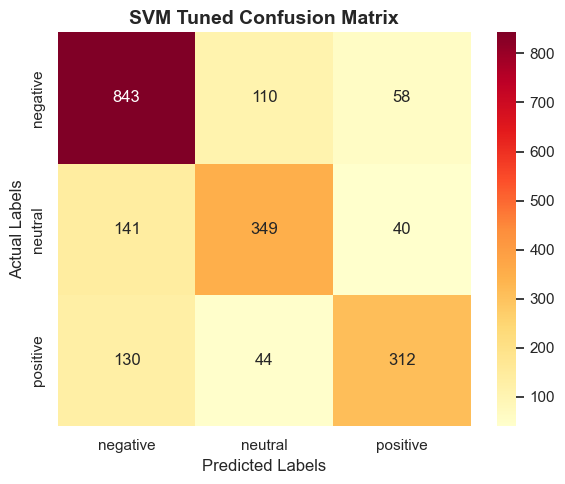

In [60]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm_tuned)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=labels, yticklabels=labels)

plt.title('SVM Tuned Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.tight_layout()
plt.show()

### ***XGBoost (eXtreme Gradient Boosting)***

In [61]:
# Classificaiton Report
print("\n=== XGBoost Classification Report ===")
labels = ['negative', 'neutral', 'positive']
print(classification_report(y_test, y_pred_xgb, target_names=labels))


=== XGBoost Classification Report ===
              precision    recall  f1-score   support

    negative       0.70      0.83      0.76      1011
     neutral       0.64      0.59      0.62       530
    positive       0.80      0.57      0.66       486

    accuracy                           0.70      2027
   macro avg       0.71      0.66      0.68      2027
weighted avg       0.71      0.70      0.70      2027



In [62]:
cm_svm = confusion_matrix(y_test, y_pred_xgb)
print("=== XGBoost Confusion Matrix ===")
print(cm_svm)

=== XGBoost Confusion Matrix ===
[[838 125  48]
 [193 314  23]
 [161  49 276]]


#### ***Hyperparamater Tuning***

In [63]:
# Classification Report
print("\n=== XGBoost Tuned Classification Report ===")
labels = ['negative', 'neutral', 'positive']
print(classification_report(y_test, y_pred_xgb_tuned, target_names=labels))


=== XGBoost Tuned Classification Report ===
              precision    recall  f1-score   support

    negative       0.72      0.84      0.77      1011
     neutral       0.65      0.61      0.63       530
    positive       0.80      0.58      0.67       486

    accuracy                           0.71      2027
   macro avg       0.72      0.67      0.69      2027
weighted avg       0.72      0.71      0.71      2027



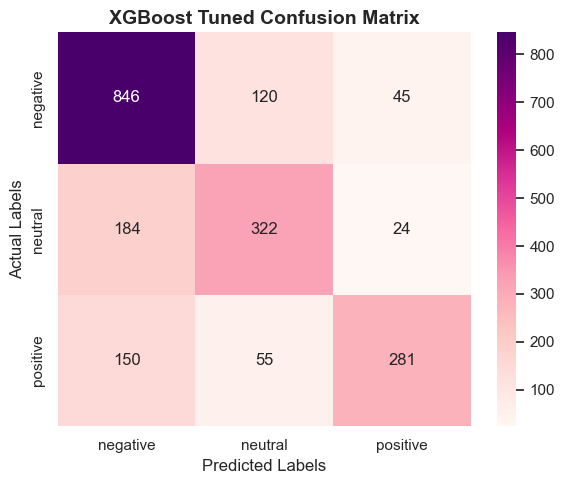

In [64]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_xgb_tuned)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='RdPu',
            xticklabels=labels, yticklabels=labels)

plt.title('XGBoost Tuned Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.tight_layout()
plt.show()

### ***Model Comparisons***

#### ***Confusion Matrix***

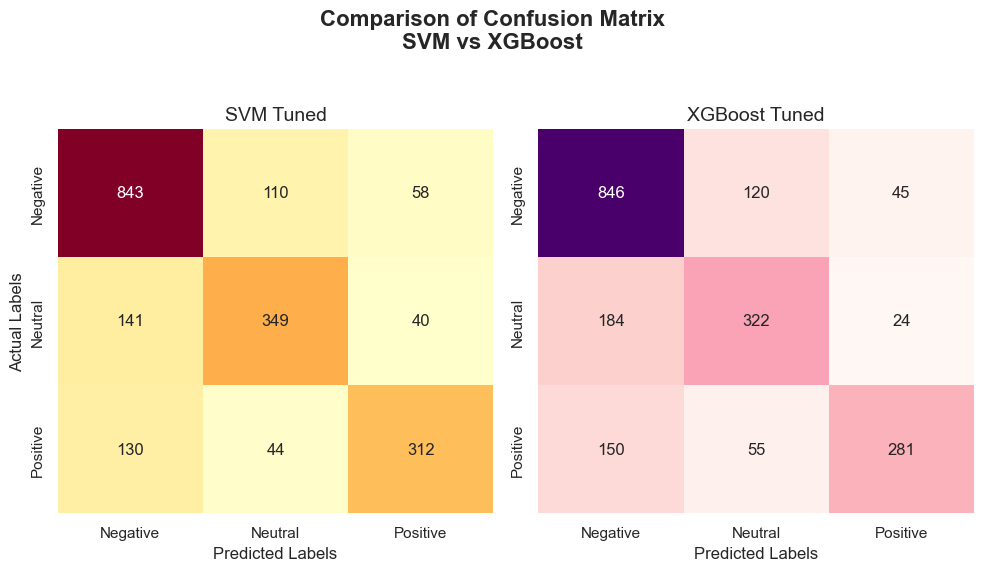

In [65]:
# Confusion Matrix
svm_cm = confusion_matrix(y_test, y_pred_svm_tuned)
xgb_cm = confusion_matrix(y_test, y_pred_xgb_tuned)

labels = ['Negative', 'Neutral', 'Positive']
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle('Comparison of Confusion Matrix\nSVM vs XGBoost', fontsize=16, fontweight='bold')

sns.heatmap(svm_cm, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=labels, yticklabels=labels, ax=axes[0], cbar=False)
axes[0].set_title('SVM Tuned', fontsize=14)
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('Actual Labels')

sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='RdPu',
            xticklabels=labels, yticklabels=labels, ax=axes[1], cbar=False)
axes[1].set_title('XGBoost Tuned', fontsize=14)
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### ***Classification Report***

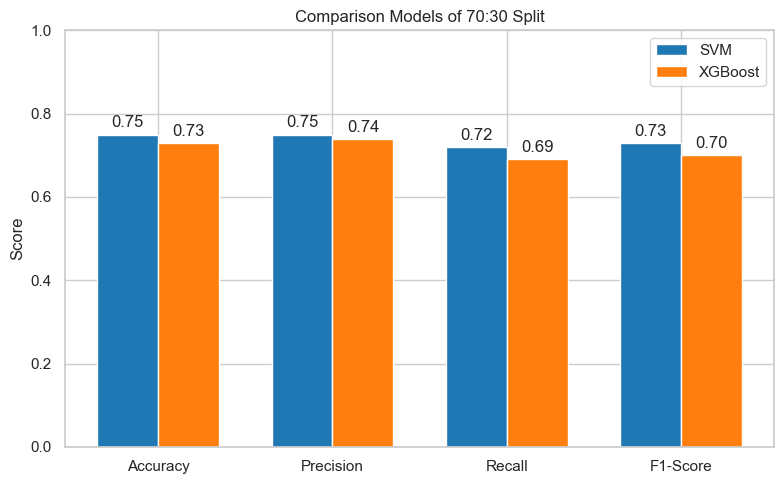

In [66]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
svm_scores = [0.75, 0.75, 0.72, 0.73]
xgb_scores = [0.73, 0.74, 0.69, 0.70]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, svm_scores, width, label='SVM', color='#1f77b4')
bars2 = ax.bar(x + width/2, xgb_scores, width, label='XGBoost', color='#ff7f0e')

ax.set_ylabel('Score')
ax.set_title('Comparison Models of 70:30 Split')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

## ***60% : 40%***

### ***Support Vector Machine (SVM)***

In [67]:
# Classification Report
print("\n=== SVM Classification Report ===")
labels = ['negative', 'neutral', 'positive']
print(classification_report(y_test, y_pred_svm, target_names=labels))


=== SVM Classification Report ===
              precision    recall  f1-score   support

    negative       0.77      0.77      0.77      1011
     neutral       0.67      0.69      0.68       530
    positive       0.69      0.67      0.68       486

    accuracy                           0.73      2027
   macro avg       0.71      0.71      0.71      2027
weighted avg       0.73      0.73      0.73      2027



In [68]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("=== SVM Confusion Matrix ===")
print(cm_svm)

=== SVM Confusion Matrix ===
[[780 132  99]
 [119 366  45]
 [110  51 325]]


#### ***Hyperparamater Tuning***

In [69]:
# Classification Report
print("\n=== Tuned SVM Classification Report ===")
labels = ['negative', 'neutral', 'positive']
print(classification_report(y_test, y_pred_svm_tuned, target_names=labels))


=== Tuned SVM Classification Report ===
              precision    recall  f1-score   support

    negative       0.76      0.83      0.79      1011
     neutral       0.69      0.66      0.68       530
    positive       0.76      0.64      0.70       486

    accuracy                           0.74      2027
   macro avg       0.74      0.71      0.72      2027
weighted avg       0.74      0.74      0.74      2027



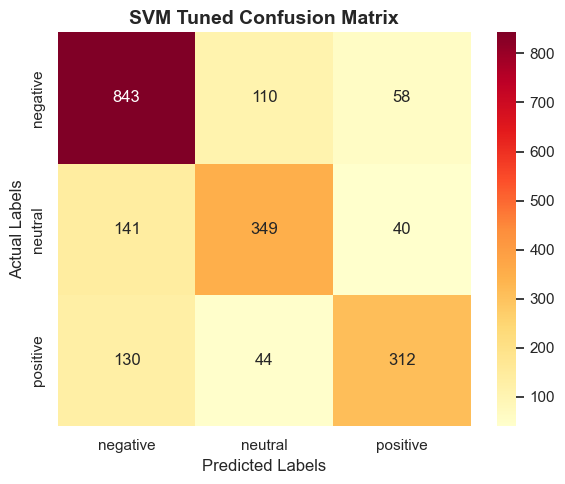

In [70]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm_tuned)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=labels, yticklabels=labels)

plt.title('SVM Tuned Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.tight_layout()
plt.show()

### ***XGBoost (eXtreme Gradient Boosting)***

In [71]:
# Classificaiton Report
print("\n=== XGBoost Classification Report ===")
labels = ['negative', 'neutral', 'positive']
print(classification_report(y_test, y_pred_xgb, target_names=labels))


=== XGBoost Classification Report ===
              precision    recall  f1-score   support

    negative       0.70      0.83      0.76      1011
     neutral       0.64      0.59      0.62       530
    positive       0.80      0.57      0.66       486

    accuracy                           0.70      2027
   macro avg       0.71      0.66      0.68      2027
weighted avg       0.71      0.70      0.70      2027



#### ***Hyperparamater Tuning***

In [72]:
# Classification Report
print("\n=== XGBoost Tuned Classification Report ===")
labels = ['negative', 'neutral', 'positive']
print(classification_report(y_test, y_pred_xgb_tuned, target_names=labels))


=== XGBoost Tuned Classification Report ===
              precision    recall  f1-score   support

    negative       0.72      0.84      0.77      1011
     neutral       0.65      0.61      0.63       530
    positive       0.80      0.58      0.67       486

    accuracy                           0.71      2027
   macro avg       0.72      0.67      0.69      2027
weighted avg       0.72      0.71      0.71      2027



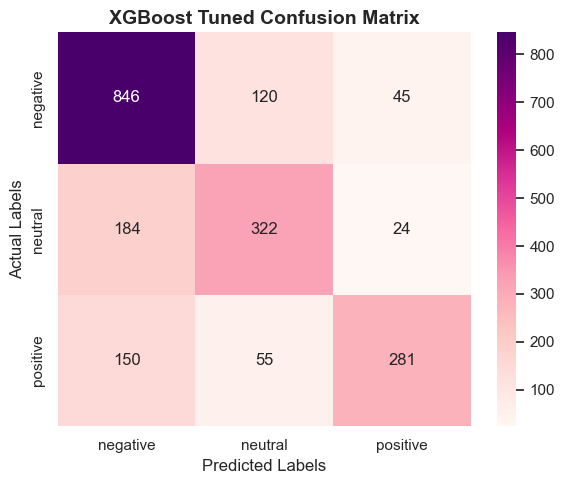

In [73]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_xgb_tuned)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='RdPu',
            xticklabels=labels, yticklabels=labels)

plt.title('XGBoost Tuned Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.tight_layout()
plt.show()

### ***Model Comparisons***

#### ***Confusion Matrix***

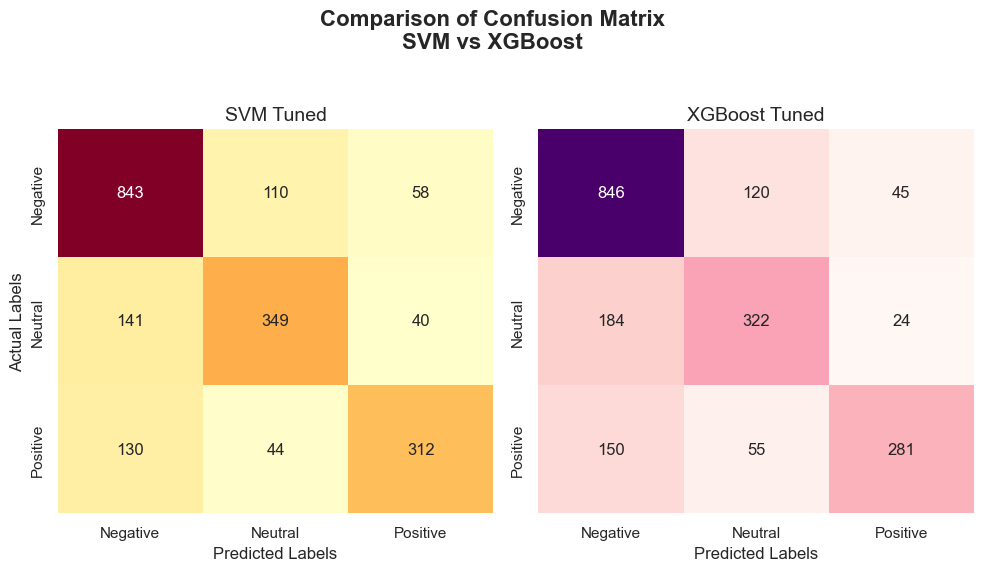

In [74]:
# Confusion Matrix
svm_cm = confusion_matrix(y_test, y_pred_svm_tuned)
xgb_cm = confusion_matrix(y_test, y_pred_xgb_tuned)

labels = ['Negative', 'Neutral', 'Positive']
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle('Comparison of Confusion Matrix\nSVM vs XGBoost', fontsize=16, fontweight='bold')

sns.heatmap(svm_cm, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=labels, yticklabels=labels, ax=axes[0], cbar=False)
axes[0].set_title('SVM Tuned', fontsize=14)
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('Actual Labels')

sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='RdPu',
            xticklabels=labels, yticklabels=labels, ax=axes[1], cbar=False)
axes[1].set_title('XGBoost Tuned', fontsize=14)
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### ***Classification Report***

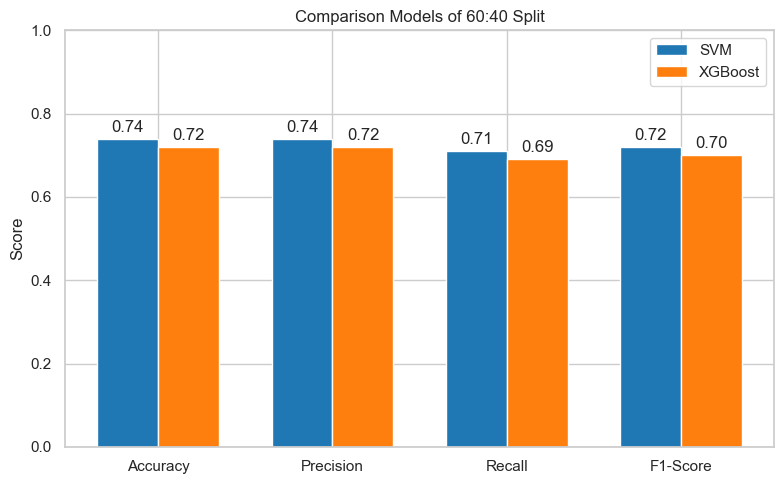

In [75]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
svm_scores = [0.74, 0.74, 0.71, 0.72]
xgb_scores = [0.72, 0.72, 0.69, 0.70]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, svm_scores, width, label='SVM', color='#1f77b4')
bars2 = ax.bar(x + width/2, xgb_scores, width, label='XGBoost', color='#ff7f0e')

ax.set_ylabel('Score')
ax.set_title('Comparison Models of 60:40 Split')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

## ***Comparison of Model Performance across All Data Split Ratios***

### ***Cross Validation Score***

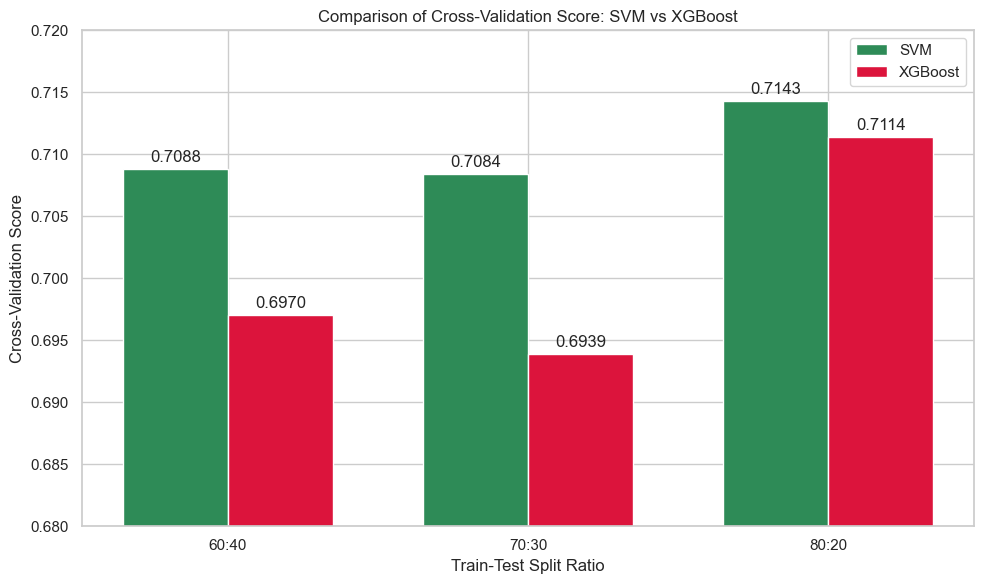

In [76]:
splits = ['60:40', '70:30', '80:20']
svm_scores = [0.7088, 0.7084, 0.7143]
xgb_scores = [0.6970, 0.6939, 0.7114]

x = np.arange(len(splits))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, svm_scores, width, label='SVM', color='seagreen')
bars2 = ax.bar(x + width/2, xgb_scores, width, label='XGBoost', color='crimson')

ax.set_ylabel('Cross-Validation Score')
ax.set_xlabel('Train-Test Split Ratio')
ax.set_title('Comparison of Cross-Validation Score: SVM vs XGBoost')
ax.set_xticks(x)
ax.set_xticklabels(splits)
ax.set_ylim(0.68, 0.72)
ax.legend()

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()

🔁 **Insight Cross-Validation Score**

> **SVM**

| Rasio Split | Best CV Score | Insight                                                                                          |
| ----------- | ------------- | ------------------------------------------------------------------------------------------------ |
| **80:20**   | **0.7143**    | Skor tertinggi dari semua, menandakan model cukup matang saat dilatih.                           |
| **70:30**   | 0.7084        | Turun sedikit, tapi masih stabil. Artinya model tetap kuat walau data latih dikurangi.           |
| **60:40**   | 0.7088        | Hampir sama dengan 70:30. Menunjukkan bahwa SVM **cukup fleksibel** terhadap jumlah data latih. |


> Kesimpulan

- Performa SVM cukup stabil di semua rasio. Bahkan ketika data latih berkurang (60:40), skor tetap konsisten. Tapi secara angka, split 80:20 memberikan skor validasi silang terbaik, meskipun berdasarkan hasil test, 70:30 yang paling seimbang.

----

> **XGBoost**

| Rasio Split | Best CV Score | Insight                                                                      |
| ----------- | ------------- | ---------------------------------------------------------------------------- |
| **80:20**   | **0.7114**    | Skor terbaik untuk XGBoost. Cukup bagus, mendekati SVM.                      |
| **70:30**   | 0.6939        | Mulai tampak penurunan, artinya model butuh lebih banyak data untuk perform. |
| **60:40**   | 0.6970        | Naik sedikit dari 70:30, tapi masih lebih rendah dari 80:20.                 |

> Kesimpulan:

- XGBoost lebih sensitif terhadap jumlah data latih. Saat proporsi data latih berkurang (di 70:30 dan 60:40), performa turun cukup terlihat. Maka, rasio 80:20 adalah pilihan paling optimal dari segi validasi.

### ***Confusion Matrix***

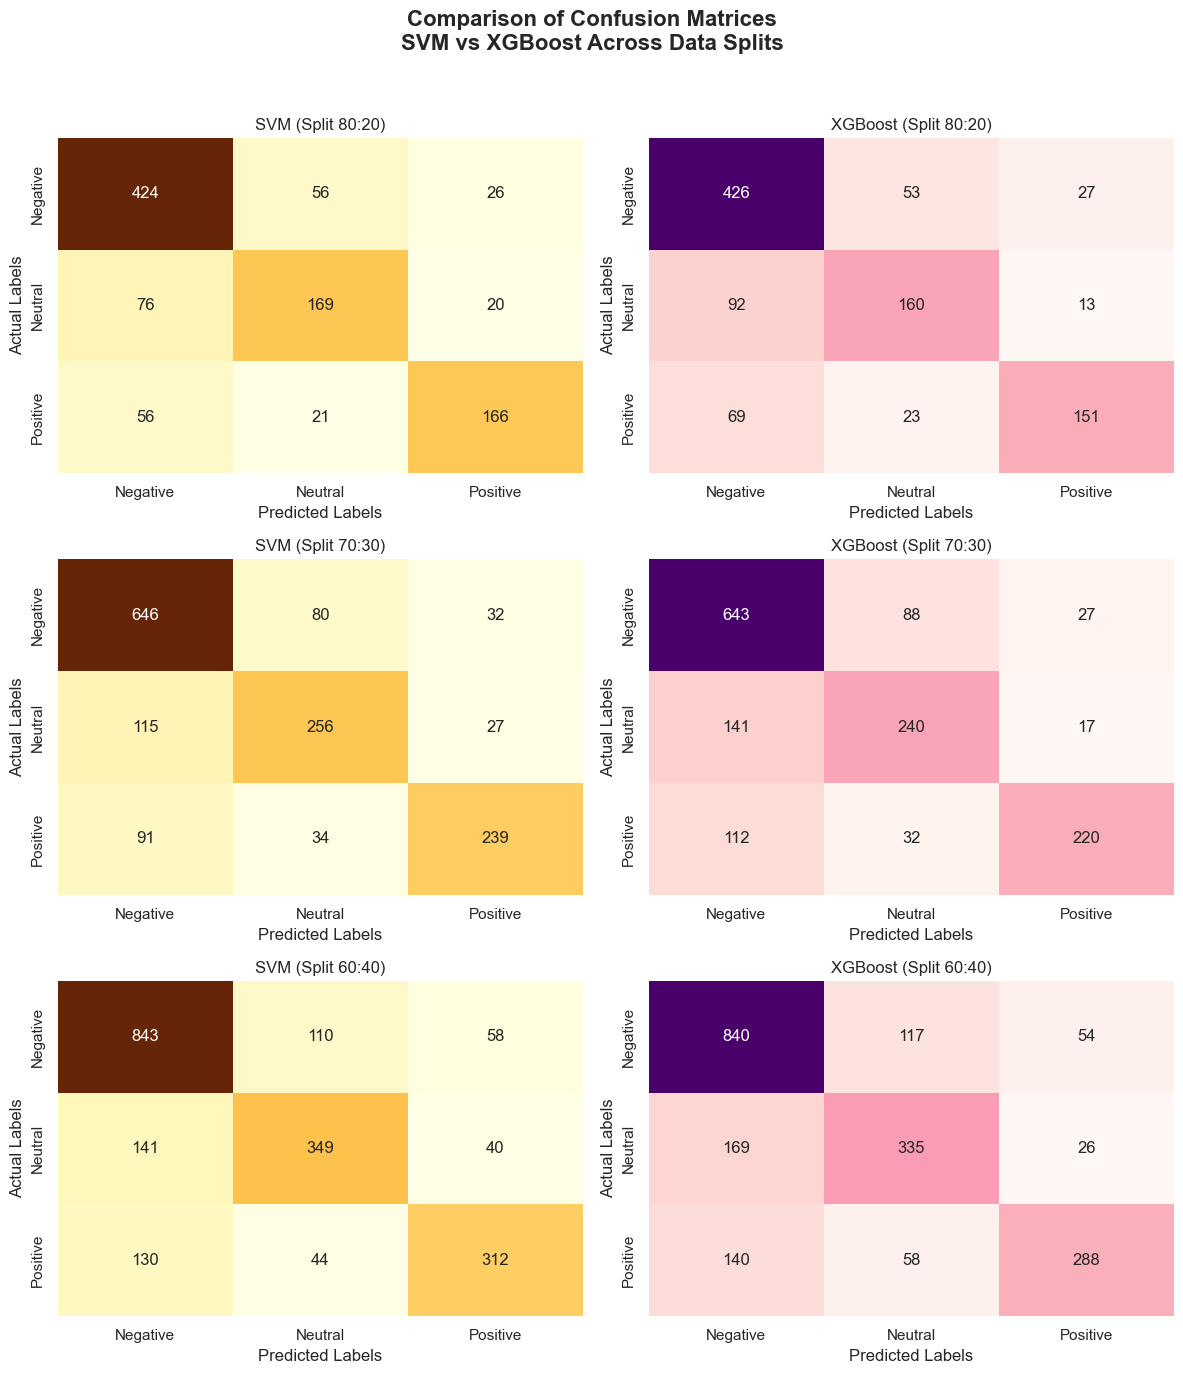

In [77]:
svm_matrices = [
    np.array([[424, 56, 26], [76, 169, 20], [56, 21, 166]]),  # 80:20
    np.array([[646, 80, 32], [115, 256, 27], [91, 34, 239]]),  # 70:30
    np.array([[843, 110, 58], [141, 349, 40], [130, 44, 312]])  # 60:40
]

xgb_matrices = [
    np.array([[426, 53, 27], [92, 160, 13], [69, 23, 151]]),  # 80:20
    np.array([[643, 88, 27], [141, 240, 17], [112, 32, 220]]),  # 70:30
    np.array([[840, 117, 54], [169, 335, 26], [140, 58, 288]])  # 60:40
]

splits = ['80:20', '70:30', '60:40']
labels = ['Negative', 'Neutral', 'Positive']

fig, axes = plt.subplots(3, 2, figsize=(12, 14))
fig.suptitle("Comparison of Confusion Matrices\nSVM vs XGBoost Across Data Splits", fontsize=16, fontweight='bold')

for i in range(3):
    sns.heatmap(svm_matrices[i], annot=True, fmt='d', cmap='YlOrBr',
                xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[i, 0])
    axes[i, 0].set_title(f'SVM (Split {splits[i]})')
    axes[i, 0].set_ylabel('Actual Labels')
    axes[i, 0].set_xlabel('Predicted Labels')

    sns.heatmap(xgb_matrices[i], annot=True, fmt='d', cmap='RdPu',
                xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[i, 1])
    axes[i, 1].set_title(f'XGBoost (Split {splits[i]})')
    axes[i, 1].set_ylabel('Actual Labels')
    axes[i, 1].set_xlabel('Predicted Labels')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**🔍 Insight Perbandingan Confusion Matrix (SVM vs XGBoost)**

1. Split 80:20

> SVM
- Kelas Negative diprediksi dengan baik: 424 dari 506 benar (83.8%).
- Neutral cukup baik: 169 dari 265 benar (63.8%), namun banyak tertukar dengan Negative.
- Positive juga cukup akurat: 166 dari 243 (68.3%).

> XGBoost
- Kelas Negative sedikit lebih baik dari SVM: 426 benar.
- Namun Neutral mengalami penurunan akurasi (160 vs 169 pada SVM).
- Positive juga menurun (151 vs 166 pada SVM).

> Insight: Pada split 80:20, SVM memiliki performa sedikit lebih baik dibanding XGBoost, khususnya pada kelas Neutral dan Positive.

2. Split 70:30

> SVM
- Kelas Negative diprediksi cukup baik: 646 dari 758 (85.2%).
- Kelas Neutral meningkat: 256 dari 398 (64.3%).
- Kelas Positive juga stabil: 239 dari 364 (65.7%).

> XGBoost
- Kelas Negative sedikit menurun (643 vs 646).
- Neutral turun ke 240, sementara false negative meningkat (lebih sering diklasifikasi sebagai Negative).
- Kelas Positive juga sedikit menurun (220 vs 239).

> Insight: Pada split 70:30, SVM kembali lebih unggul di semua kelas, terutama kelas Positive yang lebih stabil dibanding XGBoost.

3. Split 60:40

> SVM
- Akurasi kelas Negative tetap kuat: 843 dari 1011 (83.4%).
- Neutral meningkat ke 349 dari 530 (65.8%).
- Positive stabil dan menjadi prediksi terbaik di antara semua split (312 dari 486, 64.2%).

> XGBoost
- Kelas Negative hampir setara (840 vs 843).
vNeutral kembali lebih rendah (335 vs 349), dan misclass menjadi Negative meningkat.
- Positive cukup turun ke 288 dari 486 (59.2%).

> Insight: Performa SVM tetap konsisten dan unggul dalam klasifikasi Positive dan Neutral, terutama saat data uji lebih besar. XGBoost cenderung kesulitan mempertahankan performa pada kelas Neutral dan Positive saat proporsi data uji meningkat.

### ***Classification Report***

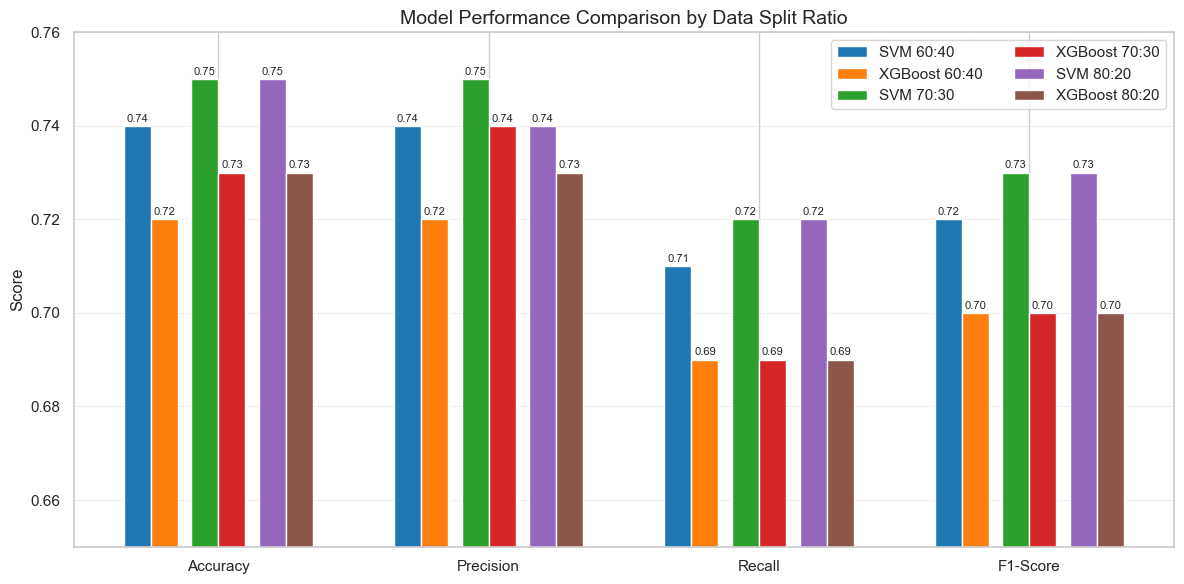

In [78]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
svm_60 = [0.74, 0.74, 0.71, 0.72]
xgb_60 = [0.72, 0.72, 0.69, 0.70]
svm_70 = [0.75, 0.75, 0.72, 0.73]
xgb_70 = [0.73, 0.74, 0.69, 0.70]
svm_80 = [0.75, 0.74, 0.72, 0.73]
xgb_80 = [0.73, 0.73, 0.69, 0.70]

x = np.arange(len(metrics))
width = 0.1

fig, ax = plt.subplots(figsize=(12, 6))
bars = [
    ax.bar(x - 0.3, svm_60, width, label='SVM 60:40', color='#1f77b4'),
    ax.bar(x - 0.2, xgb_60, width, label='XGBoost 60:40', color='#ff7f0e'),
    ax.bar(x - 0.05, svm_70, width, label='SVM 70:30', color='#2ca02c'),
    ax.bar(x + 0.05, xgb_70, width, label='XGBoost 70:30', color='#d62728'),
    ax.bar(x + 0.2, svm_80, width, label='SVM 80:20', color='#9467bd'),
    ax.bar(x + 0.3, xgb_80, width, label='XGBoost 80:20', color='#8c564b'),
]

for group in bars:
    for rect in group:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 0.0005,
                f'{height:.2f}', ha='center', va='bottom', fontsize=8)

ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Performance Comparison by Data Split Ratio', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0.65, 0.76)
ax.legend(loc='upper right', ncol=2)
ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

🔍 **Insight Perbandingan Matrix (SVM vs XGBoost)**

📈 Akurasi
- Tertinggi: SVM dengan split 70:30 dan 80:20 (0.75)
- XGBoost stabil di angka 0.72–0.73

> Insight: SVM mampu membuat prediksi lebih akurat secara umum, bahkan saat data latih lebih sedikit.

🎯 Precision
- Tertinggi: SVM split 70:30 (0.75)
- XGBoost hanya mencapai 0.74 (70:30) dan cenderung stagnan di split lain

> Insight: SVM lebih mampu menghindari false positive (prediksi salah positif), sangat penting jika ingin memastikan kualitas prediksi positif (misal: klasifikasi sentimen positif secara tepat).

🔄 Recall
- Tertinggi: SVM dengan split 70:30 (0.72)
- XGBoost selalu lebih rendah dari SVM, maksimal hanya di 0.69

> Insight: SVM lebih sensitif dalam menangkap semua kelas positif/target sebenarnya (false negative lebih kecil), cocok untuk kasus ketika penting untuk menangkap seluruh opini atau isu sensitif dari data.

⚖️ F1-Score
- Tertinggi: SVM split 70:30 (0.73)
- XGBoost maksimal di 0.70 dan tidak meningkat pada semua split

> Insight: F1-Score menggabungkan keunggulan precision dan recall menunjukkan bahwa SVM lebih seimbang.



### ***Determining the Best Combination***

🎯 **Rasio Data Latih & Uji yang Efektif**

Rasio 70:30 paling optimal berdasarkan hasil evaluasi model.

Alasan utama:
- Memberikan keseimbangan ideal antara kapasitas belajar model (data latih) dan pengujian generalisasi (data uji).
- F1-Score dan akurasi stabil di ketiga label kelas.

🧠 **Algoritma yang Paling Efektif**

SVM unggul konsisten di semua rasio dibandingkan XGBoost.

Keunggulan:
- Stabil dalam memprediksi kelas yang sulit seperti Neutral dan Positive.
- Memiliki F1-score tertinggi di kelas mayoritas dan minoritas.
- Performa lebih merata dan tidak fluktuatif, bahkan saat data uji diperbesar.

💡 Rekomendasi Kombinasi Terbaik

SVM dengan Rasio 70:30 merupakan Kombinasi paling optimal

| Komponen Evaluasi   | Rekomendasi Terbaik                    | Justifikasi                                                              |
| ------------------- | -------------------------------------- | ------------------------------------------------------------------------ |
| **Rasio Split**     | **70% Latih / 30% Uji**                | Keseimbangan pembelajaran & evaluasi, stabil pada seluruh metrik         |
| **Algoritma**       | **Support Vector Machine (SVM) Tuned** | Robust, konsisten, unggul di kelas kritis                                |
| **Kombinasi Final** | **SVM dengan rasio 70:30**             | Performa tertinggi secara keseluruhan dalam akurasi, presisi, recall, F1 |


📌 Kesimpulan Akhir

Kombinasi SVM dengan rasio 70:30 tidak hanya memberikan metrik evaluasi terbaik, tetapi juga menjamin kestabilan model dalam memprediksi data nyata yang beragam, menjadikannya pilihan paling direkomendasikan untuk produksi atau pengujian lanjutan.